# Basic tests for the HHH neuron

In [1]:
# from bokeh.plotting import figure
# from bokeh.io import show, output_notebook
# from bokeh.layouts import column, row
# from bokeh.models import Range1d
# output_notebook()

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 50})

%matplotlib inline

import seaborn as sns
sns.set(font_scale=3)
sns.set_style('ticks')

import numpy as np

from resistingrhythm.util import poisson_impulse
from resistingrhythm.util import poisson_oscillation
from resistingrhythm.util import current_pulse
from resistingrhythm.util import load_spikes

from resistingrhythm.neurons import HHH

/Users/type/anaconda/envs/py2/lib/python2.7/site-packages/brian2/core/variables.py:174: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return np.issubdtype(np.bool, self.dtype)


# Shared params

In [30]:
time = 4
N = 100

V_e = 0
V_i = -80e-3

tau_e = 5e-3
tau_i = 10e-3

tau_h = 1

w = (5e-6, 50e-6)

# Generate some spiking input....

In [36]:
# Empty
ns_in, ts_in = np.asarray([]), np.asarray([])
ns_osc, ts_osc = np.asarray([]), np.asarray([])

# Or load some input
osc_name = "/Users/type/Code/resistingrhythm/data/osc130.csv"
stim_name = "/Users/type/Code/resistingrhythm/data/stim3.csv"
ns_osc, ts_osc = load_spikes(osc_name)
ns_in, ts_in = load_spikes(stim_name)

# Tonic bias?

In [37]:
# external_current = current_pulse(time, t_onset=2, t_offset=2.5, I=0.5e-6)

# Run HHH

In [38]:
results = HHH(
    time,
    ns_in,
    ts_in,
    ns_osc,
    ts_osc,
    external_current=None,
    N=N,
    Ca_target=0.003,
    tau_h=tau_h,
    w_in=w,
    tau_in=tau_e,
    V_in=V_e,
    bias_in=0.0e-9,
    w_osc=w,
    tau_osc=tau_e,
    V_osc=V_e,
    sigma=0,
    homeostasis=True,
    time_step=1e-5,
    seed_value=42
)

In [39]:
ts_x, ns_x = results['ts'], results['ns']
results.keys(), results['calcium'][:, -100].mean()

(['I_K',
  'I_in',
  'I_Ca',
  'g_Ca',
  'g_total',
  'v_m',
  'I_Na',
  'I_osc',
  'ts',
  'times',
  'g_KCa',
  'calcium',
  'g_Na',
  'g_K',
  'ns'],
 0.003208396486944729)

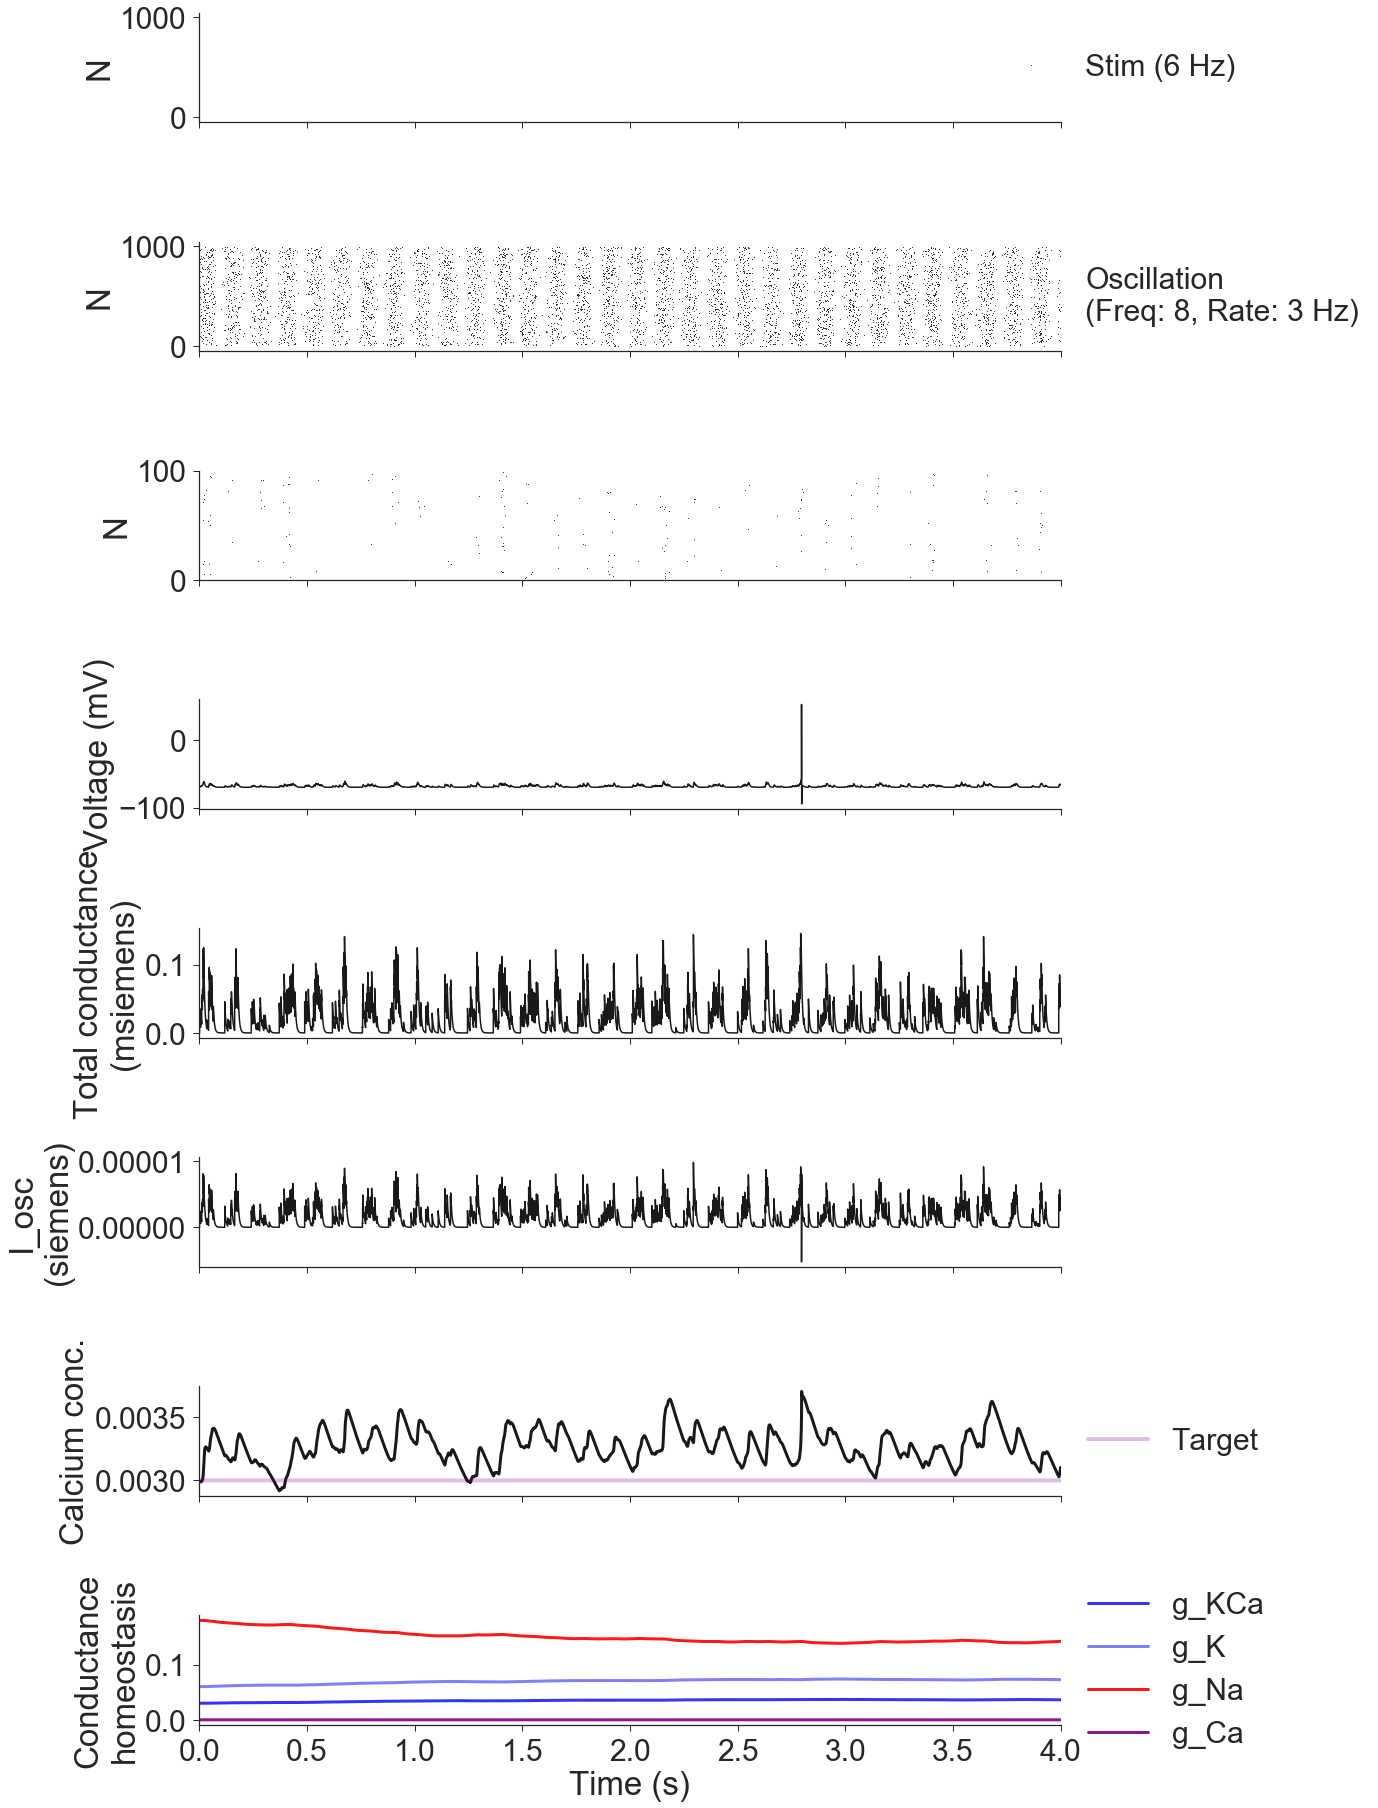

In [40]:
# Which neuron's traces to plot (all spikes shown)
n = 0

# --------------------------------------------------------------------------------
fig, ax = plt.subplots(8, sharex=True, figsize=(16, 26))

# Drives
_ = ax[0].plot(ts_in, ns_in, markersize=1, marker='o', linestyle='', color='k', 
               label='Stim (6 Hz)')
_ = ax[0].set_ylabel("N")
_ = ax[0].legend(loc='center left', bbox_to_anchor=(.9, 0.5))
_ = ax[0].set_xlim(0, time)

_ = ax[1].plot(ts_osc, ns_osc, markersize=1, marker='o', linestyle='', color='k', 
               label='Oscillation\n(Freq: 8, Rate: 3 Hz)')
_ = ax[1].set_ylabel("N")
_ = ax[1].legend(loc='center left', bbox_to_anchor=(.9, 0.5))
_ = ax[1].set_xlim(0, time)

# Obs. spikes
_ = ax[2].plot(ts_x, ns_x, markersize=1, marker='o', linestyle='', color='k')
_ = ax[2].set_ylabel("N")
_ = ax[2].set_ylim(0, 100)
_ = ax[2].legend(loc='center left', bbox_to_anchor=(.9, 0.5))

# Vm
t = results['times']
v = results['v_m'][n, :]*1e3
_ = ax[3].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[3].set_ylabel("Voltage (mV)")
# _ = ax[1].set_ylim(-100, 40)

# Gtotal
t = results['times']
v = results['g_total'][n, :]*1e3
_ = ax[4].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[4].set_ylabel("Total conductance\n(msiemens)")
# _ = ax[1].set_ylim(-100, 40)

# Gtotal
t = results['times']
v = results['I_osc'][n, :]
_ = ax[5].plot(t, v, linestyle='-', linewidth=1.5, color='k', alpha=0.9)
_ = ax[5].set_ylabel("I_osc\n(siemens)")
# _ = ax[1].set_ylim(-100, 40)

# Ca
ca_target = 0.003
t = results['times']
v = results['calcium'][n, :]
_ = ax[6].plot(t, v, linestyle='-', linewidth=3, color='k', alpha=0.9)
_ = ax[6].plot(t, np.repeat(ca_target, v.size), linestyle='-', linewidth=4, color='purple', alpha=0.25, 
               label="Target")
_ = ax[6].set_ylabel("Calcium conc.")
_ = ax[6].legend(loc='center left', bbox_to_anchor=(1, 0.5))
# _ = ax[1].set_ylim(-100, 40)

# Homeostatsis
t = results['times']
v1 = results['g_KCa'][n, :]
v2 = results['g_K'][n, :]
v3 = results['g_Na'][n, :]
v4 = results['g_Ca'][n, :]
_ = ax[7].plot(t, v1, linestyle='-', linewidth=3, color='blue', alpha=0.8, label="g_KCa")
_ = ax[7].plot(t, v2, linestyle='-', linewidth=3, color='blue', alpha=0.5, label="g_K")
_ = ax[7].plot(t, v3, linestyle='-', linewidth=3, color='red', alpha=0.9, label="g_Na")
_ = ax[7].plot(t, v4, linestyle='-', linewidth=3, color='purple', alpha=0.9, label="g_Ca")
_ = ax[7].set_xlabel("Time (s)")
_ = ax[7].set_ylabel("Conductance\nhomeostasis")
_ = ax[7].legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
sns.despine()